# BERT-LDA Review Insights

**This project aims to analyze user reviews of ChatGPT using advanced natural language processing techniques. We employ BERT for sentiment analysis to understand user sentiments accurately and use LDA for topic modeling to uncover prevalent themes in the feedback.**

To dive into the ChatGPT reviews, we turned to BERT for sentiment analysis because it’s exceptionally good at understanding the nuances in language. Unlike simpler methods that might miss the subtleties of how people express their feelings, BERT can grasp the context and meaning behind user comments more accurately. This means we get a clearer picture of whether users are genuinely happy, neutral, or unhappy with their experience. By using BERT, we can better categorize the sentiments in the reviews, which helps us pinpoint areas where we’re doing well and where we need to improve.

After analyzing sentiments with BERT, we used Latent Dirichlet Allocation (LDA) to dig deeper into what users are talking about. LDA helps us uncover the main topics or themes in the reviews, giving us a clearer view of what people are focusing on, whether it’s specific features or common issues. By combining the sentiment scores with the insights from LDA, we can better understand not just how people feel, but also what’s driving those feelings. This approach lets us make more informed decisions and improvements, ensuring we address the right areas to enhance user satisfaction.

In [1]:
import numpy as np 
import pandas as pd
import os
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data = pd.read_csv('chatgpt_reviews.csv')

In [4]:
data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,be1549d8-da36-40ab-9b8d-14b002e06389,Jatin Jaix,excillent,5,0,1.2025.126,2025-05-19 13:30:21,1.2025.126
1,44e6bb53-e62e-476e-b784-8bebb3a16c90,Mithila Mim,Awesome,5,0,1.2025.126,2025-05-19 13:30:19,1.2025.126
2,27e9026a-263b-4234-8d6f-944d0fc1eaac,Geoff Kalere,very super and helpful tool,5,0,1.2025.126,2025-05-19 13:30:19,1.2025.126
3,18318e2c-8aed-49ce-b4a6-4b358d0c15ff,꧁TN ༒ KANISH༒❹❹❹꧂,nice,5,0,1.2025.126,2025-05-19 13:30:12,1.2025.126
4,d95d1887-f43e-4b6a-9a2a-d8d6160618e9,Sima Branwal,that's best👍👍👍💯,5,0,1.2025.105,2025-05-19 13:30:10,1.2025.105


In [5]:
data['reviewCreatedVersion'].fillna('Unknown', inplace=True)
data['appVersion'].fillna('Unknown', inplace=True)
data['userName'].fillna('Unknown', inplace=True)
data['content'].fillna('No review provided', inplace=True)

C:\Users\c\AppData\Local\Temp\ipykernel_11604\3261436894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['reviewCreatedVersion'].fillna('Unknown', inplace=True)
C:\Users\c\AppData\Local\Temp\ipykernel_11604\3261436894.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [6]:
data.dtypes

reviewId                object
userName                object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
appVersion              object
dtype: object

In [7]:
data.isnull().sum()

reviewId                0
userName                0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
appVersion              0
dtype: int64

In [8]:
data.isnull().sum()

reviewId                0
userName                0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
appVersion              0
dtype: int64

In [9]:
df = data[['content']]

In [10]:
dates = data['at']

# Convertimos la serie a datetime
dates = pd.to_datetime(dates, errors='coerce')  



dates = dates.dt.date

In [11]:
dates

0         2025-05-19
1         2025-05-19
2         2025-05-19
3         2025-05-19
4         2025-05-19
             ...    
557716    2023-07-27
557717    2023-09-23
557718    2023-11-08
557719    2023-07-25
557720    2023-11-30
Name: at, Length: 557721, dtype: object

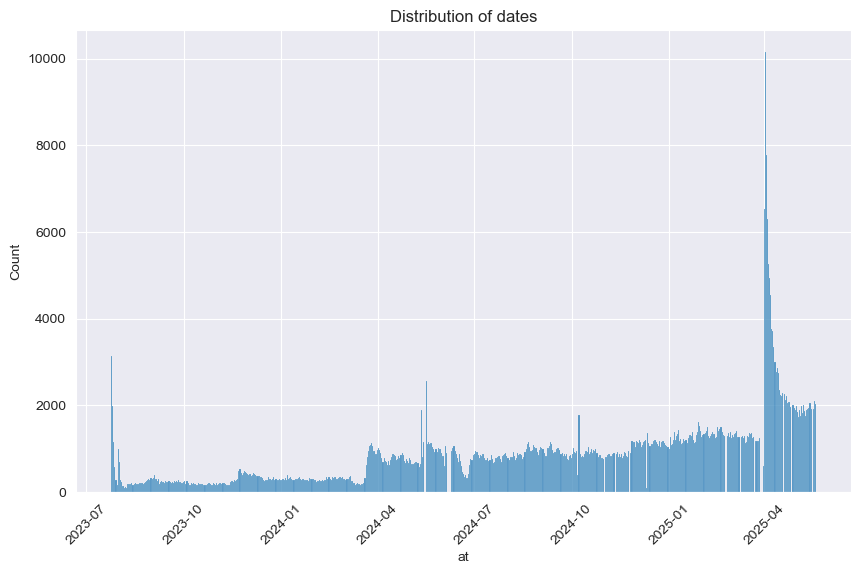

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(dates, bins=40)
plt.xticks(rotation=45)
plt.title('Distribution of dates')
plt.show()

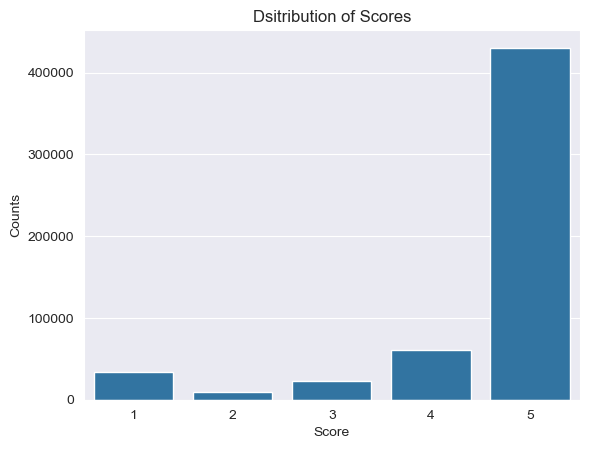

In [13]:
sns.countplot(x='score', data = data)

# Etiquetas y título
plt.xlabel('Score')
plt.ylabel('Counts')
plt.title('Dsitribution of Scores')

# Mostrar gráfico
plt.show()

In [14]:
#Define negative and positive
data.score = data.score.apply(lambda x: 1 if x >= 4 else 0)

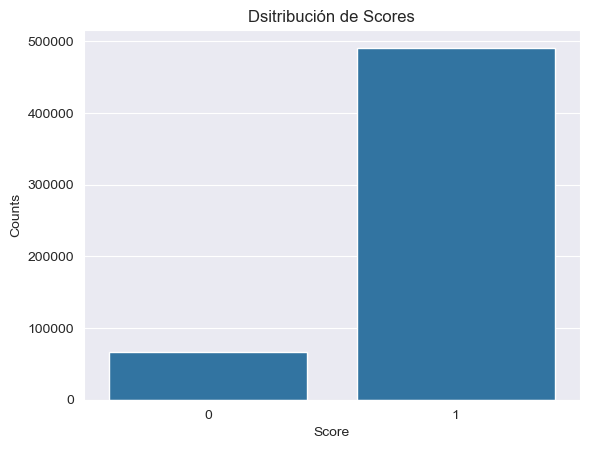

In [15]:

sns.countplot(x='score', data=data)


plt.xlabel('Score')
plt.ylabel('Counts')
plt.title('Dsitribución de Scores')

# Mostrar gráfico
plt.show()

In [16]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
excluir = string.punctuation
def eliminate_signal(text):
    return text.translate(str.maketrans('', '', excluir))


text='NLP,....!!!.project.@#$%'
print(eliminate_signal(text))

del text

NLPproject


In [18]:
data['content'].head

<bound method NDFrame.head of 0                           excillent
1                             Awesome
2         very super and helpful tool
3                                nice
4                     that's best👍👍👍💯
                     ...             
557716                    Update 2023
557717                      its grear
557718                  Funtastic App
557719                         hi all
557720             expert application
Name: content, Length: 557721, dtype: object>

In [19]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to C:\Users\c/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\c/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\c/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\c/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
stop_words = set(stopwords.words('english'))

In [21]:
def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces and newlines
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text) # Tokenization
    tokens = [word for word in tokens if word not in stop_words] # Remove stop words
    return ' '.join(tokens) # Join tokens back into a single string

In [22]:
data['content'] = data['content'].apply(preprocess_text)

In [23]:
data['content'].head(50)

0                                             excillent
1                                               awesome
2                                    super helpful tool
3                                                  nice
4                                            thats best
5                                              nice app
6                                               perfect
7                                                  good
8                                                friend
9                                          best chatgpt
10                                       useful app hai
11    outstanding ai assistant highly recommended ch...
12                                                super
13                                      nice app thanks
14                                                 good
15                                           good study
16                                        nice app good
17                           chatgpt useful home

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [25]:
stopwords = set(STOPWORDS)
stopwords.update(['chatgpt', 'app', 'apps', 'gpt', 'review', 'reviews', 'ChatGPT'])

In [26]:
print(data['content'].apply(len).describe()) 

count    557721.000000
mean         25.090366
std          44.309941
min           0.000000
25%           4.000000
50%          10.000000
75%          24.000000
max         500.000000
Name: content, dtype: float64


In [27]:
print(f"Number of reviews: {df.shape[0]}")

Number of reviews: 557721


In [28]:
data['review_length'] = data['content'].apply(len)
print(f"Average review length: {data['review_length'].mean()}")

Average review length: 25.090365971516224


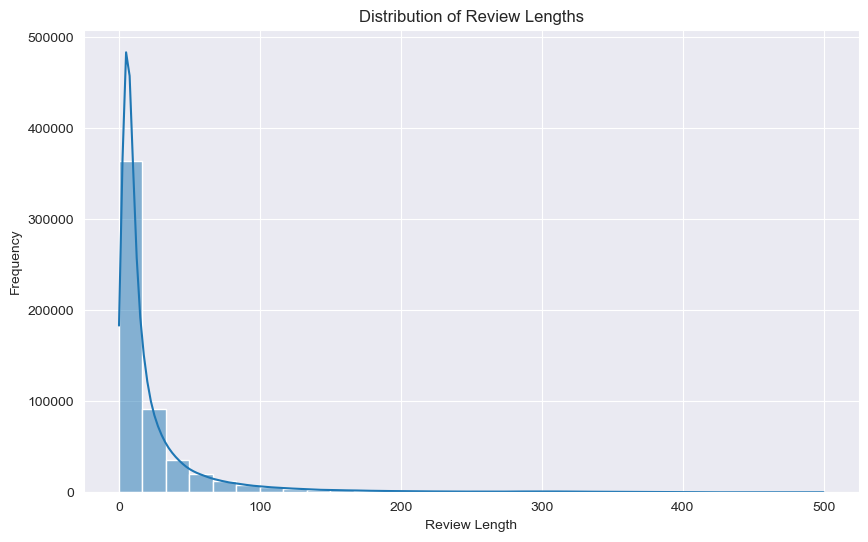

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [30]:
text = ' '.join(data['content'])
#wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=stopwords).generate(text)

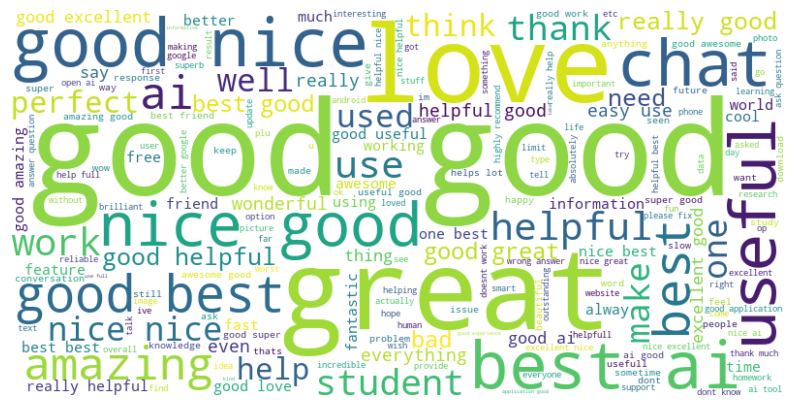

In [31]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,review_length
0,be1549d8-da36-40ab-9b8d-14b002e06389,Jatin Jaix,excillent,1,0,1.2025.126,2025-05-19 13:30:21,1.2025.126,9
1,44e6bb53-e62e-476e-b784-8bebb3a16c90,Mithila Mim,awesome,1,0,1.2025.126,2025-05-19 13:30:19,1.2025.126,7
2,27e9026a-263b-4234-8d6f-944d0fc1eaac,Geoff Kalere,super helpful tool,1,0,1.2025.126,2025-05-19 13:30:19,1.2025.126,18
3,18318e2c-8aed-49ce-b4a6-4b358d0c15ff,꧁TN ༒ KANISH༒❹❹❹꧂,nice,1,0,1.2025.126,2025-05-19 13:30:12,1.2025.126,4
4,d95d1887-f43e-4b6a-9a2a-d8d6160618e9,Sima Branwal,thats best,1,0,1.2025.105,2025-05-19 13:30:10,1.2025.105,10


In [33]:
import emoji
def eliminate_emojis(text):
    
    if all(char in emoji.EMOJI_DATA for char in text):
        texto = emoji.demojize(text)  # Convierte los emojis a texto

        text = re.sub(r'_', ' ', text)  
        text = re.sub(r'::', ' ', text)  
        text = re.sub(r':', '', text)  

       

       
        palabras_unicas = list(dict.fromkeys(text.split()))
        text = ' '.join(palabras_unicas)

        
        return text 

    else: 
   
      patron_emoji = re.compile("["
                                u"\U0001F600-\U0001F64F"  
                                u"\U0001F300-\U0001F5FF"  
                                u"\U0001F680-\U0001F6FF"  
                                u"\U0001F700-\U0001F77F"  
                                u"\U0001F780-\U0001F7FF"  
                                u"\U0001F800-\U0001F8FF"  
                                u"\U0001F900-\U0001F9FF"  
                                u"\U0001FA00-\U0001FA6F"  
                                u"\U0001FA70-\U0001FAFF"  
                                u"\U00002702-\U000027B0"  
                                u"\U000024C2-\U0001F251"  
                                "]+", flags=re.UNICODE)

      
      return patron_emoji.sub(r'', text)

In [34]:

text = "abcdefg😭😭😭,hijklmn 🤢"
x = "🥵🥵🤢"

print(text)
print(eliminate_emojis(text))

print(x)
print(eliminate_emojis(x))

del text

abcdefg😭😭😭,hijklmn 🤢
abcdefg,hijklmn 
🥵🥵🤢
🥵🥵🤢


In [35]:
data.content = data.content.apply(eliminate_emojis)

In [36]:
data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,review_length
0,be1549d8-da36-40ab-9b8d-14b002e06389,Jatin Jaix,excillent,1,0,1.2025.126,2025-05-19 13:30:21,1.2025.126,9
1,44e6bb53-e62e-476e-b784-8bebb3a16c90,Mithila Mim,awesome,1,0,1.2025.126,2025-05-19 13:30:19,1.2025.126,7
2,27e9026a-263b-4234-8d6f-944d0fc1eaac,Geoff Kalere,super helpful tool,1,0,1.2025.126,2025-05-19 13:30:19,1.2025.126,18
3,18318e2c-8aed-49ce-b4a6-4b358d0c15ff,꧁TN ༒ KANISH༒❹❹❹꧂,nice,1,0,1.2025.126,2025-05-19 13:30:12,1.2025.126,4
4,d95d1887-f43e-4b6a-9a2a-d8d6160618e9,Sima Branwal,thats best,1,0,1.2025.105,2025-05-19 13:30:10,1.2025.105,10


In [37]:
data['at'] = dates


In [38]:
data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,review_length
0,be1549d8-da36-40ab-9b8d-14b002e06389,Jatin Jaix,excillent,1,0,1.2025.126,2025-05-19,1.2025.126,9
1,44e6bb53-e62e-476e-b784-8bebb3a16c90,Mithila Mim,awesome,1,0,1.2025.126,2025-05-19,1.2025.126,7
2,27e9026a-263b-4234-8d6f-944d0fc1eaac,Geoff Kalere,super helpful tool,1,0,1.2025.126,2025-05-19,1.2025.126,18
3,18318e2c-8aed-49ce-b4a6-4b358d0c15ff,꧁TN ༒ KANISH༒❹❹❹꧂,nice,1,0,1.2025.126,2025-05-19,1.2025.126,4
4,d95d1887-f43e-4b6a-9a2a-d8d6160618e9,Sima Branwal,thats best,1,0,1.2025.105,2025-05-19,1.2025.105,10


# BERT Sentiment Analysis

In [39]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
import torch

C:\Users\c\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
#nlp = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english', device =0)

# Split

In [41]:
data_sampled = data.sample(n=30000, random_state=42)

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 你的 DataFrame，score 列应为 0（消极）或 1（积极）
df = data_sampled[['content', 'score']]
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['content'].tolist(), df['score'].tolist(), test_size=0.2, stratify=df['score'])

In [43]:
df

,content,score
95971,good,1
246252,good,1
435767,terbaik,1
466801,best companion feel like mentor pocket,1
59661,nise,1
...,...,...
280991,,1
78002,awesome,1
47002,good,1
432292,good app,1


In [44]:
from datasets import Dataset
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# 构建 Dataset
train_df = pd.DataFrame({'text': train_texts, 'label': train_labels})
val_df = pd.DataFrame({'text': val_texts, 'label': val_labels})
train_ds = Dataset.from_pandas(train_df)
val_ds = Dataset.from_pandas(val_df)

# 分词函数
def tokenize(batch):
    return tokenizer(batch["text"], padding='max_length', truncation=True)

train_ds = train_ds.map(tokenize, batched=True)
val_ds = val_ds.map(tokenize, batched=True)


C:\Users\c\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Map: 100%|██████████| 6000/6000 [00:01<00:00, 4705.30 examples/s]


In [47]:
#%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


In [45]:
import torch
print(torch.__version__)


2.5.1+cu121


In [46]:
import torch
print(torch.cuda.is_available())  # True 表示可以使用 GPU
print(torch.cuda.device_count())  # 返回 GPU 数量
print(torch.cuda.get_device_name(0))  # 显示 GPU 名称


True
1
NVIDIA GeForce RTX 3060


In [47]:
from datasets import Dataset
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# 构建 Dataset
train_df = pd.DataFrame({'text': train_texts, 'label': train_labels})
val_df = pd.DataFrame({'text': val_texts, 'label': val_labels})
train_ds = Dataset.from_pandas(train_df)
val_ds = Dataset.from_pandas(val_df)

# 分词函数
def tokenize(batch):
    return tokenizer(batch["text"], padding='max_length', truncation=True)

train_ds = train_ds.map(tokenize, batched=True)
val_ds = val_ds.map(tokenize, batched=True)

from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score

def model_init():
    return BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds)
    }

import optuna

def model_train(trial):
    args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",
        learning_rate=trial.suggest_float("lr", 2e-5, 5e-5),
        per_device_train_batch_size=trial.suggest_categorical("batch", [8, 16]),
        num_train_epochs=trial.suggest_int("epochs", 2, 3),
        weight_decay=trial.suggest_float("wd", 0.0, 0.3),
        disable_tqdm=True,
        logging_dir="./logs",
    )
    print(f'Starting trail{trial.number+1}')
    print(f'Hyperparameters: {args.to_dict()}')

    trainer = Trainer(
        model_init=model_init,
        args=args,
        train_dataset=train_ds,
        eval_dataset=val_ds,
        compute_metrics=compute_metrics,
    )
    print(f'Finished trail{trial.number+1}')
    trainer.train()
    return trainer.evaluate()["eval_f1"]

C:\Users\c\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Map: 100%|██████████| 6000/6000 [00:01<00:00, 4786.03 examples/s]


In [48]:
study = optuna.create_study(direction="maximize")
study.optimize(model_train, n_trials=3)

print("Best hyperparameters:", study.best_params)

[I 2025-05-27 21:26:17,105] A new study created in memory with name: no-name-37c97310-8787-45e1-929c-1d21e557a339
C:\Users\c\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Starting trail1
Hyperparameters: {'output_dir': './results', 'overwrite_output_dir': False, 'do_train': False, 'do_eval': True, 'do_predict': False, 'evaluation_strategy': 'epoch', 'prediction_loss_only': False, 'per_device_train_batch_size': 8, 'per_device_eval_batch_size': 8, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accumulation_steps': 1, 'eval_accumulation_steps': None, 'eval_delay': 0, 'learning_rate': 2.570789453337148e-05, 'weight_decay': 0.049205231726588756, 'adam_beta1': 0.9, 'adam_beta2': 0.999, 'adam_epsilon': 1e-08, 'max_grad_norm': 1.0, 'num_train_epochs': 3, 'max_steps': -1, 'lr_scheduler_type': 'linear', 'lr_scheduler_kwargs': {}, 'warmup_ratio': 0.0, 'warmup_steps': 0, 'log_level': 'passive', 'log_level_replica': 'warning', 'log_on_each_node': True, 'logging_dir': './logs', 'logging_strategy': 'steps', 'logging_first_step': False, 'logging_steps': 500, 'logging_nan_inf_filter': True, 'save_strategy': 'steps', 'save_steps': 500, 'save

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Finished trail1


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'loss': 0.3288, 'grad_norm': 0.8347512483596802, 'learning_rate': 2.4279678170406397e-05, 'epoch': 0.16666666666666666}
{'loss': 0.3424, 'grad_norm': 1.6733057498931885, 'learning_rate': 2.2851461807441312e-05, 'epoch': 0.3333333333333333}
{'loss': 0.3104, 'grad_norm': 5.7871012687683105, 'learning_rate': 2.1423245444476234e-05, 'epoch': 0.5}
{'loss': 0.3146, 'grad_norm': 0.7854734063148499, 'learning_rate': 1.999502908151115e-05, 'epoch': 0.6666666666666666}
{'loss': 0.3268, 'grad_norm': 0.7864530086517334, 'learning_rate': 1.8566812718546068e-05, 'epoch': 0.8333333333333334}
{'loss': 0.3107, 'grad_norm': 3.1887199878692627, 'learning_rate': 1.7138596355580983e-05, 'epoch': 1.0}
{'eval_loss': 0.32701680064201355, 'eval_accuracy': 0.91, 'eval_f1': 0.9509090909090909, 'eval_runtime': 114.6698, 'eval_samples_per_second': 52.324, 'eval_steps_per_second': 6.541, 'epoch': 1.0}
{'loss': 0.3006, 'grad_norm': 46.94487380981445, 'learning_rate': 1.5710379992615905e-05, 'epoch': 1.1666666666666

[I 2025-05-27 22:45:23,986] Trial 0 finished with value: 0.9514438109251425 and parameters: {'lr': 2.570789453337148e-05, 'batch': 8, 'epochs': 3, 'wd': 0.049205231726588756}. Best is trial 0 with value: 0.9514438109251425.


{'eval_loss': 0.3496970236301422, 'eval_accuracy': 0.912, 'eval_f1': 0.9514438109251425, 'eval_runtime': 114.4675, 'eval_samples_per_second': 52.417, 'eval_steps_per_second': 6.552, 'epoch': 3.0}
Starting trail2
Hyperparameters: {'output_dir': './results', 'overwrite_output_dir': False, 'do_train': False, 'do_eval': True, 'do_predict': False, 'evaluation_strategy': 'epoch', 'prediction_loss_only': False, 'per_device_train_batch_size': 16, 'per_device_eval_batch_size': 8, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accumulation_steps': 1, 'eval_accumulation_steps': None, 'eval_delay': 0, 'learning_rate': 2.5502557017479454e-05, 'weight_decay': 0.09972064646728218, 'adam_beta1': 0.9, 'adam_beta2': 0.999, 'adam_epsilon': 1e-08, 'max_grad_norm': 1.0, 'num_train_epochs': 3, 'max_steps': -1, 'lr_scheduler_type': 'linear', 'lr_scheduler_kwargs': {}, 'warmup_ratio': 0.0, 'warmup_steps': 0, 'log_level': 'passive', 'log_level_replica': 'warning', 'log_on_each_nod

C:\Users\c\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Finished trail2


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'loss': 0.3137, 'grad_norm': 2.3127732276916504, 'learning_rate': 2.2668939571092848e-05, 'epoch': 0.3333333333333333}
{'loss': 0.2807, 'grad_norm': 1.0367223024368286, 'learning_rate': 1.983532212470624e-05, 'epoch': 0.6666666666666666}
{'loss': 0.2875, 'grad_norm': 1.8375380039215088, 'learning_rate': 1.7001704678319635e-05, 'epoch': 1.0}
{'eval_loss': 0.2809065878391266, 'eval_accuracy': 0.9105, 'eval_f1': 0.9507836128677482, 'eval_runtime': 173.5197, 'eval_samples_per_second': 34.578, 'eval_steps_per_second': 4.322, 'epoch': 1.0}
{'loss': 0.258, 'grad_norm': 1.8446871042251587, 'learning_rate': 1.416808723193303e-05, 'epoch': 1.3333333333333333}
{'loss': 0.2435, 'grad_norm': 1.901829481124878, 'learning_rate': 1.1334469785546424e-05, 'epoch': 1.6666666666666665}
{'loss': 0.2502, 'grad_norm': 0.9740840196609497, 'learning_rate': 8.500852339159818e-06, 'epoch': 2.0}
{'eval_loss': 0.2946048378944397, 'eval_accuracy': 0.9108333333333334, 'eval_f1': 0.9509309364395121, 'eval_runtime': 

[I 2025-05-28 00:11:11,590] Trial 1 finished with value: 0.9511160302527208 and parameters: {'lr': 2.5502557017479454e-05, 'batch': 16, 'epochs': 3, 'wd': 0.09972064646728218}. Best is trial 0 with value: 0.9514438109251425.


{'eval_loss': 0.30624961853027344, 'eval_accuracy': 0.9116666666666666, 'eval_f1': 0.9511160302527208, 'eval_runtime': 174.5861, 'eval_samples_per_second': 34.367, 'eval_steps_per_second': 4.296, 'epoch': 3.0}
Starting trail3
Hyperparameters: {'output_dir': './results', 'overwrite_output_dir': False, 'do_train': False, 'do_eval': True, 'do_predict': False, 'evaluation_strategy': 'epoch', 'prediction_loss_only': False, 'per_device_train_batch_size': 16, 'per_device_eval_batch_size': 8, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accumulation_steps': 1, 'eval_accumulation_steps': None, 'eval_delay': 0, 'learning_rate': 4.552930241153766e-05, 'weight_decay': 0.10906234532777773, 'adam_beta1': 0.9, 'adam_beta2': 0.999, 'adam_epsilon': 1e-08, 'max_grad_norm': 1.0, 'num_train_epochs': 2, 'max_steps': -1, 'lr_scheduler_type': 'linear', 'lr_scheduler_kwargs': {}, 'warmup_ratio': 0.0, 'warmup_steps': 0, 'log_level': 'passive', 'log_level_replica': 'warning', 'lo

C:\Users\c\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Finished trail3


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'loss': 0.3201, 'grad_norm': 19.293617248535156, 'learning_rate': 3.7941085342948056e-05, 'epoch': 0.3333333333333333}
{'loss': 0.2876, 'grad_norm': 1.5756468772888184, 'learning_rate': 3.0352868274358442e-05, 'epoch': 0.6666666666666666}
{'loss': 0.2972, 'grad_norm': 1.3827049732208252, 'learning_rate': 2.276465120576883e-05, 'epoch': 1.0}
{'eval_loss': 0.28970882296562195, 'eval_accuracy': 0.9111666666666667, 'eval_f1': 0.9509885057471265, 'eval_runtime': 171.4023, 'eval_samples_per_second': 35.005, 'eval_steps_per_second': 4.376, 'epoch': 1.0}
{'loss': 0.2699, 'grad_norm': 2.203972578048706, 'learning_rate': 1.5176434137179221e-05, 'epoch': 1.3333333333333333}
{'loss': 0.2465, 'grad_norm': 4.982108116149902, 'learning_rate': 7.5882170685896104e-06, 'epoch': 1.6666666666666665}
{'loss': 0.2549, 'grad_norm': 1.5039522647857666, 'learning_rate': 0.0, 'epoch': 2.0}
{'eval_loss': 0.28190815448760986, 'eval_accuracy': 0.9115, 'eval_f1': 0.9511993382961125, 'eval_runtime': 171.4268, 'eval

[I 2025-05-28 01:06:24,451] Trial 2 finished with value: 0.9511993382961125 and parameters: {'lr': 4.552930241153766e-05, 'batch': 16, 'epochs': 2, 'wd': 0.10906234532777773}. Best is trial 0 with value: 0.9514438109251425.


{'eval_loss': 0.28190815448760986, 'eval_accuracy': 0.9115, 'eval_f1': 0.9511993382961125, 'eval_runtime': 171.4548, 'eval_samples_per_second': 34.995, 'eval_steps_per_second': 4.374, 'epoch': 2.0}
Best hyperparameters: {'lr': 2.570789453337148e-05, 'batch': 8, 'epochs': 3, 'wd': 0.049205231726588756}


In [49]:
# 提取最佳参数
best_params = study.best_params

# 构建新的训练参数对象
final_args = TrainingArguments(
    output_dir="./final_model",
    evaluation_strategy="epoch",
    learning_rate=best_params["lr"],
    per_device_train_batch_size=best_params["batch"],
    num_train_epochs=best_params["epochs"],
    weight_decay=best_params["wd"],
    logging_dir="./logs",
    report_to="none"  # 禁用 wandb
)

# 构建 Trainer
final_trainer = Trainer(
    model_init=model_init,
    args=final_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    compute_metrics=compute_metrics,
)

# 重新训练模型（完整训练）
final_trainer.train()


C:\Users\c\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.310700,0.327017,0.910000,0.950909
2,0.264800,0.355389,0.910833,0.950796
3,0.236900,0.349697,0.912000,0.951444


TrainOutput(global_step=9000, training_loss=0.28522293768988716, metrics={'train_runtime': 4684.5232, 'train_samples_per_second': 15.37, 'train_steps_per_second': 1.921, 'total_flos': 1.894399598592e+16, 'train_loss': 0.28522293768988716, 'epoch': 3.0})

In [50]:
final_trainer.save_model("./saved_model")
tokenizer.save_pretrained("./saved_model")

('./saved_model\\tokenizer_config.json',
 './saved_model\\special_tokens_map.json',
 './saved_model\\vocab.txt',
 './saved_model\\added_tokens.json')

In [51]:
# 评估验证集
final_metrics = final_trainer.evaluate()
print("📊 Final evaluation results:")
for key, value in final_metrics.items():
    print(f"{key}: {value:.4f}")


📊 Final evaluation results:
eval_loss: 0.3497
eval_accuracy: 0.9120
eval_f1: 0.9514
eval_runtime: 115.9054
eval_samples_per_second: 51.7660
eval_steps_per_second: 6.4710
epoch: 3.0000


In [52]:
from sklearn.metrics import classification_report

# 用最终训练好的模型对验证集进行预测
predictions = final_trainer.predict(val_ds)

# 提取预测标签和真实标签
pred_labels = predictions.predictions.argmax(-1)
true_labels = predictions.label_ids

# 打印 classification report
report = classification_report(true_labels, pred_labels, target_names=["Negative", "Positive"])
print(report)


              precision    recall  f1-score   support

    Negative       0.74      0.41      0.53       724
    Positive       0.92      0.98      0.95      5276

    accuracy                           0.91      6000
   macro avg       0.83      0.70      0.74      6000
weighted avg       0.90      0.91      0.90      6000



# LDA

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [54]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['content'])
lda = LatentDirichletAllocation(n_components=5)
lda.fit(X)

LatentDirichletAllocation(n_components=5)

In [55]:
topic_distribution = lda.transform(X)

In [56]:
df['topic'] = np.argmax(topic_distribution, axis=1)

C:\Users\c\AppData\Local\Temp\ipykernel_11604\2826658337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['topic'] = np.argmax(topic_distribution, axis=1)


In [61]:
df.head()

,content,score,topic
366697,love,1,0
209046,great,1,0
210083,nice,1,3
48517,good,1,0
15081,bad wrong result,0,1


In [57]:
n_words = 10
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[-n_words:]]
    print(f"Topic {topic_idx}: {' '.join(top_words)}")

Topic 0: better students help really perfect like app amazing great helpful
Topic 1: outstanding experience work wonderful easy fantastic ok use app nice
Topic 2: chatgpt superb application gpt chat thank app super useful love
Topic 3: slow usefull happy world cool wow ai app awesome best
Topic 4: interesting work apps really working bad aap app excellent good


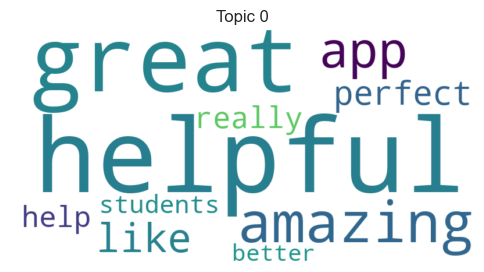

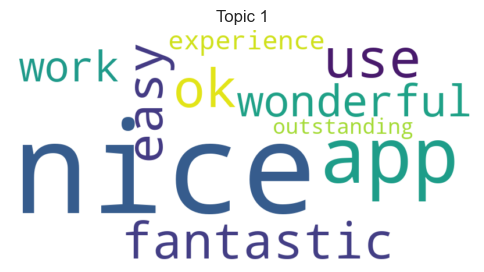

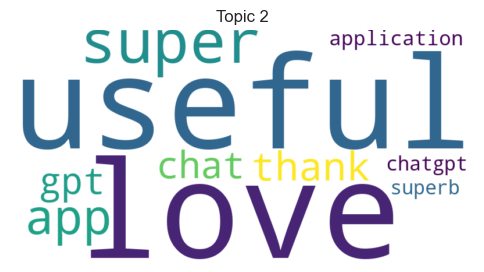

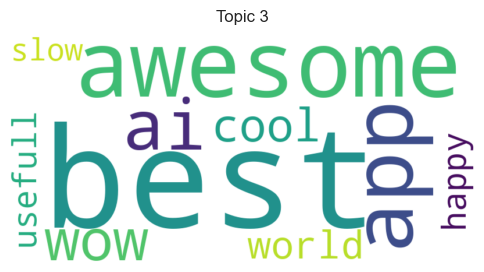

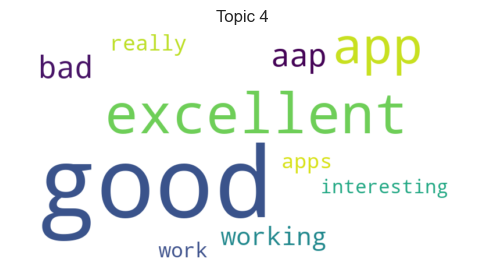

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

n_words = 10
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    plt.figure(figsize=(6, 4))
    word_freqs = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_words - 1:-1]}
    wc = WordCloud(width=800, height=400, background_color='white')
    wc.generate_from_frequencies(word_freqs)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_idx}")
    plt.show()


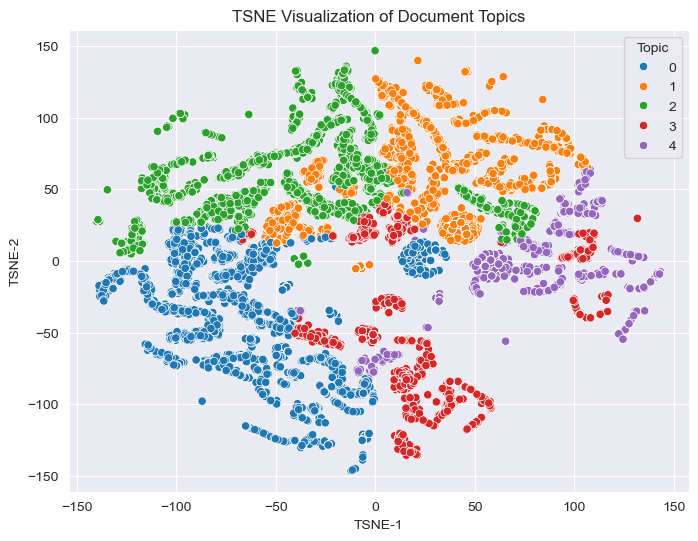

In [59]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, random_state=42)
tsne_values = tsne_model.fit_transform(topic_distribution)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_values[:, 0], y=tsne_values[:, 1], hue=df['topic'], palette="tab10")
plt.title("TSNE Visualization of Document Topics")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.legend(title="Topic")
plt.show()
